Topic :        Challenge Set **1**
 
Subject :      Explore MTA turnstile data

Date :         10/20/2021

Name :         Ugur Selim Ozen

# Benson Challenges

#### Challenge 1   
  
- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Load the files into a pandas DataFrame (hint: `pd.read_csv()` to load files and `pd.concat()` to combine DataFrames)

Your dataframe should look something like this:


|    | C/A   | UNIT   | SCP      | STATION   | LINENAME   | DIVISION   | DATE       | TIME     | DESC    |   ENTRIES |   EXITS                                                                |
|---:|:------|:-------|:---------|:----------|:-----------|:-----------|:-----------|:---------|:--------|----------:|-----------------------------------------------------------------------:|
|  0 | A002  | R051   | 02-00-00 | 59 ST     | NQR456     | BMT        | 08/27/2016 | 00:00:00 | REGULAR |   5799442 |                                                                1966041 |
|  1 | A002  | R051   | 02-00-00 | 59 ST     | NQR456     | BMT        | 08/27/2016 | 04:00:00 | REGULAR |   5799463 |                                                                1966044 |
|  2 | A002  | R051   | 02-00-00 | 59 ST     | NQR456     | BMT        | 08/27/2016 | 08:00:00 | REGULAR |   5799492 |                                                                1966079 |
|  3 | A002  | R051   | 02-00-00 | 59 ST     | NQR456     | BMT        | 08/27/2016 | 12:00:00 | REGULAR |   5799610 |                                                                1966155 |
|  4 | A002  | R051   | 02-00-00 | 59 ST     | NQR456     | BMT        | 08/27/2016 | 16:00:00 | REGULAR |   5799833 |                                                                1966214 |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mta_df1 = pd.read_csv("turnstile_211002.csv")
mta_df2 = pd.read_csv("turnstile_211009.csv")
mta_df3 = pd.read_csv("turnstile_211016.csv")

mta_df = pd.concat([mta_df1,mta_df2,mta_df3])
mta_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,20:00:00,REGULAR,7641437,2615217
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2021,00:00:00,REGULAR,7641505,2615230
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2021,04:00:00,REGULAR,7641516,2615233
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2021,08:00:00,REGULAR,7641526,2615246
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2021,12:00:00,REGULAR,7641583,2615274


#### Challenge 2

- Let's turn this into a time series.

- Our pandas dataframe has columns called `Date` and `Time` (what datatype did pandas assign to these columns on import?), however in python and pandas we can convert date and time information to _datetime_ objects, which allow us to do time-based operations

- Using either [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) in pandas or the [python datetime library](https://docs.python.org/2/library/datetime.html), combine the `Date` and `Time` columns into a single new column of the datetime datatype

In [3]:
mta_df.dtypes

C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                  int64
EXITS                                                                    int64
dtype: object

In [4]:
mta_df["DATETIME"]= pd.to_datetime(mta_df['DATE'] + ' ' + mta_df['TIME'])
mta_df = mta_df.drop(["DATE","TIME"],1)
print(mta_df.dtypes)
mta_df.head(10)

C/A                                                                             object
UNIT                                                                            object
SCP                                                                             object
STATION                                                                         object
LINENAME                                                                        object
DIVISION                                                                        object
DESC                                                                            object
ENTRIES                                                                          int64
EXITS                                                                            int64
DATETIME                                                                datetime64[ns]
dtype: object


C:\Users\Ugur\AppData\Local\Temp/ipykernel_5928/1711271742.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  mta_df = mta_df.drop(["DATE","TIME"],1)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641078,2615082,2021-09-25 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641091,2615083,2021-09-25 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641100,2615107,2021-09-25 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641135,2615156,2021-09-25 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641265,2615188,2021-09-25 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641437,2615217,2021-09-25 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641505,2615230,2021-09-26 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641516,2615233,2021-09-26 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641526,2615246,2021-09-26 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641583,2615274,2021-09-26 12:00:00


#### Challenge 3

- Each row is a turnstile, identified by a combination of  the `C/A`, `UNIT`, `SCP`, and `STATION` columns, with information on entries and exits at that turnstile every n hours. (What is n?) We want total daily entries. 
- Group the data so that it represents **daily entries** for each turnstile (hint: `pd.groupby` or `DataFrame.groupby`)

In [5]:
mta_df["TURNSTILE"] = mta_df["C/A"] + " | " + mta_df["UNIT"] + " | " + mta_df["SCP"] + " | " + mta_df["STATION"]
mta_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,DATETIME,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641078,2615082,2021-09-25 00:00:00,A002 | R051 | 02-00-00 | 59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641091,2615083,2021-09-25 04:00:00,A002 | R051 | 02-00-00 | 59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641100,2615107,2021-09-25 08:00:00,A002 | R051 | 02-00-00 | 59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641135,2615156,2021-09-25 12:00:00,A002 | R051 | 02-00-00 | 59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641265,2615188,2021-09-25 16:00:00,A002 | R051 | 02-00-00 | 59 ST
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641437,2615217,2021-09-25 20:00:00,A002 | R051 | 02-00-00 | 59 ST
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641505,2615230,2021-09-26 00:00:00,A002 | R051 | 02-00-00 | 59 ST
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641516,2615233,2021-09-26 04:00:00,A002 | R051 | 02-00-00 | 59 ST
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641526,2615246,2021-09-26 08:00:00,A002 | R051 | 02-00-00 | 59 ST
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641583,2615274,2021-09-26 12:00:00,A002 | R051 | 02-00-00 | 59 ST


* **Each row is a turnstile, identified by a combination of the C/A, UNIT, SCP, and STATION columns, with information on entries and exits at that turnstile every 4 hours**.

In [6]:
max_entries = mta_df.groupby(by=[mta_df['TURNSTILE'] , mta_df['DATETIME'].dt.date]).max()[['ENTRIES']]
min_entries = mta_df.groupby(by=[mta_df['TURNSTILE'] , mta_df['DATETIME'].dt.date]).min()[['ENTRIES']]
max_entries['TOTAL_ENTRIES'] = max_entries['ENTRIES'] - min_entries['ENTRIES']
max_entries = max_entries.drop("ENTRIES",1)
max_entries.head(10)

C:\Users\Ugur\AppData\Local\Temp/ipykernel_5928/1105727461.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  max_entries = max_entries.drop("ENTRIES",1)


TOTAL_ENTRIES
TURNSTILE                      DATETIME                 
A002 | R051 | 02-00-00 | 59 ST 2021-09-25            359
                               2021-09-26            328
                               2021-09-27            600
                               2021-09-28            587
                               2021-09-29            620
                               2021-09-30            602
                               2021-10-01            634
                               2021-10-02            331
                               2021-10-03            287
                               2021-10-04            590

In [10]:
max_entries [ max_entries["TOTAL_ENTRIES"] > 20000]

TOTAL_ENTRIES
TURNSTILE                                DATETIME                 
A013 | R081 | 01-03-00 | 49 ST           2021-10-12        5264597
H001 | R175 | 00-06-00 | 8 AV            2021-10-10     1995576773
H012 | R268 | 01-00-00 | LORIMER ST      2021-09-27         317662
H012 | R268 | 01-00-01 | LORIMER ST      2021-09-27        9631888
H041 | R152 | 00-05-01 | CANARSIE-ROCKAW 2021-10-06         458751
...                                                            ...
S101 | R070 | 00-00-02 | ST. GEORGE      2021-09-30         183886
                                         2021-10-01         183879
                                         2021-10-02         183771
                                         2021-10-03         183749
                                         2021-10-04         183800

[62 rows x 1 columns]

#### Challenge 4

We will plot the daily time series for a single turnstile.

In ipython notebook, add this to the beginning of your next cell:
```
    %matplotlib inline
```
This will make your matplotlib graphs integrate nicely with the
notebook. 

To plot the time series, import matplotlib with
```
    import matplotlib.pyplot as plt
```
- Select one turnstile (combination of [`C/A`, `UNIT`, `SCP`, `STATION`])
- Filter your pandas DataFrame so it only represents a single turnstile (make sure that turnstile has entries for multiple days).
- Using matplotlib, create a plot with the days on the X axis and the daily entries for that turnstile on the Y axis

You can use the following as a starting point:
```
    plt.figure(figsize=(10,3))
    plt.plot(<days>,<entries>)
```

Text(0.5, 1.0, 'A002 | R051 | 02-00-00 | 59 ST')

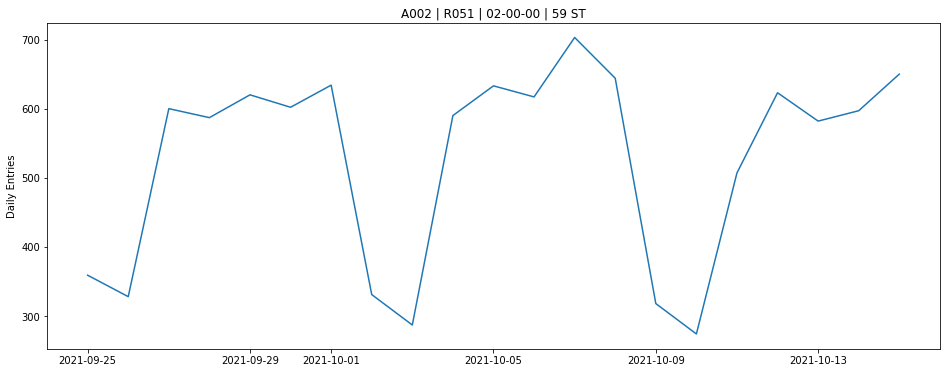

In [7]:
%matplotlib inline
filtered_mta_df = max_entries.loc["A002 | R051 | 02-00-00 | 59 ST"]
plt.figure(figsize=(16,6))
plt.plot(filtered_mta_df.index , filtered_mta_df['TOTAL_ENTRIES'])
plt.ylabel('Daily Entries')
plt.title('A002 | R051 | 02-00-00 | 59 ST')

#### Challenge 5

- So far we've been operating on a single turnstile level, let's
  combine turnstiles in the same ControlArea/Unit/Station combo. There
  are some ControlArea/Unit/Station groups that have a single
  turnstile, but most have multiple turnstiles-- same value for the
  C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each
ControlArea/UNIT/STATION combo, for each day, sum the counts from each
turnstile belonging to that combo. (hint: `pd.groupby`)

In [8]:
mta_df["C/A | UNIT | STATION"] = mta_df["C/A"] + " | " + mta_df["UNIT"] +  " | " + mta_df["STATION"]
mta_df = mta_df.drop("TURNSTILE",1)
mta_df.head(10)

C:\Users\Ugur\AppData\Local\Temp/ipykernel_5700/2754269121.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  mta_df = mta_df.drop("TURNSTILE",1)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,DATETIME,C/A | UNIT | STATION
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641078,2615082,2021-09-25 00:00:00,A002 | R051 | 59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641091,2615083,2021-09-25 04:00:00,A002 | R051 | 59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641100,2615107,2021-09-25 08:00:00,A002 | R051 | 59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641135,2615156,2021-09-25 12:00:00,A002 | R051 | 59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641265,2615188,2021-09-25 16:00:00,A002 | R051 | 59 ST
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641437,2615217,2021-09-25 20:00:00,A002 | R051 | 59 ST
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641505,2615230,2021-09-26 00:00:00,A002 | R051 | 59 ST
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641516,2615233,2021-09-26 04:00:00,A002 | R051 | 59 ST
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641526,2615246,2021-09-26 08:00:00,A002 | R051 | 59 ST
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641583,2615274,2021-09-26 12:00:00,A002 | R051 | 59 ST


In [9]:
max_entries1 = mta_df.groupby(by=[mta_df["C/A | UNIT | STATION"] , mta_df["SCP"] ,  mta_df['DATETIME'].dt.date]).max()[['ENTRIES']]
min_entries1 = mta_df.groupby(by=[mta_df["C/A | UNIT | STATION"] , mta_df["SCP"] ,  mta_df['DATETIME'].dt.date]).min()[['ENTRIES']]
max_entries1['TOTAL_ENTRIES'] = max_entries1['ENTRIES'] - min_entries1['ENTRIES']
max_entries1 = max_entries1.drop("ENTRIES",1)
max_entries1.head(10)

C:\Users\Ugur\AppData\Local\Temp/ipykernel_5700/1438263086.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  max_entries1 = max_entries1.drop("ENTRIES",1)


TOTAL_ENTRIES
C/A | UNIT | STATION SCP      DATETIME                 
A002 | R051 | 59 ST  02-00-00 2021-09-25            359
                              2021-09-26            328
                              2021-09-27            600
                              2021-09-28            587
                              2021-09-29            620
                              2021-09-30            602
                              2021-10-01            634
                              2021-10-02            331
                              2021-10-03            287
                              2021-10-04            590

#### Challenge 6

Similarly, combine everything in each station, and come up with **daily** time
series for each STATION, by adding up all the turnstiles in a station.

In [10]:
mta_df["C/A | UNIT | SCP"] = mta_df["C/A"] + " | " + mta_df["UNIT"] + " | " + mta_df["SCP"]
mta_df = mta_df.drop("C/A | UNIT | STATION",1)
mta_df.head(10)

C:\Users\Ugur\AppData\Local\Temp/ipykernel_5700/162311743.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  mta_df = mta_df.drop("C/A | UNIT | STATION",1)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,DATETIME,C/A | UNIT | SCP
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641078,2615082,2021-09-25 00:00:00,A002 | R051 | 02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641091,2615083,2021-09-25 04:00:00,A002 | R051 | 02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641100,2615107,2021-09-25 08:00:00,A002 | R051 | 02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641135,2615156,2021-09-25 12:00:00,A002 | R051 | 02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641265,2615188,2021-09-25 16:00:00,A002 | R051 | 02-00-00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641437,2615217,2021-09-25 20:00:00,A002 | R051 | 02-00-00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641505,2615230,2021-09-26 00:00:00,A002 | R051 | 02-00-00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641516,2615233,2021-09-26 04:00:00,A002 | R051 | 02-00-00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641526,2615246,2021-09-26 08:00:00,A002 | R051 | 02-00-00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7641583,2615274,2021-09-26 12:00:00,A002 | R051 | 02-00-00


In [11]:
max_entries2 = mta_df.groupby(by=[mta_df["STATION"] , mta_df["C/A | UNIT | SCP"] ,  mta_df['DATETIME'].dt.date]).max()[['ENTRIES']]
min_entries2 = mta_df.groupby(by=[mta_df["STATION"] , mta_df["C/A | UNIT | SCP"] ,  mta_df['DATETIME'].dt.date]).min()[['ENTRIES']]
max_entries2['TOTAL_ENTRIES'] = max_entries2['ENTRIES'] - min_entries2['ENTRIES']
max_entries2 = max_entries2.drop("ENTRIES",1)
max_entries2.head(10)

C:\Users\Ugur\AppData\Local\Temp/ipykernel_5700/754895452.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  max_entries2 = max_entries2.drop("ENTRIES",1)


TOTAL_ENTRIES
STATION C/A | UNIT | SCP       DATETIME                 
1 AV    H007 | R248 | 00-00-00 2021-09-25            412
                               2021-09-26            308
                               2021-09-27            663
                               2021-09-28            741
                               2021-09-29            732
                               2021-09-30            711
                               2021-10-01            752
                               2021-10-02            342
                               2021-10-03            265
                               2021-10-04            746

In [12]:
max_entries2 = max_entries2.groupby(["STATION","DATETIME"]).sum()

#### Challenge 7

Plot the daily time series for a station.

In [13]:
max_entries2.head(21)

TOTAL_ENTRIES
STATION DATETIME                 
1 AV    2021-09-25           6239
        2021-09-26           5166
        2021-09-27           8611
        2021-09-28           8673
        2021-09-29           9196
        2021-09-30           9305
        2021-10-01           9401
        2021-10-02           6305
        2021-10-03           5067
        2021-10-04           8775
        2021-10-05           9002
        2021-10-06           9058
        2021-10-07           9266
        2021-10-08           9161
        2021-10-09           5749
        2021-10-10           4153
        2021-10-11           5937
        2021-10-12           8912
        2021-10-13           9233
        2021-10-14           9356
        2021-10-15           9440

Text(0.5, 1.0, '1 AV STATION')

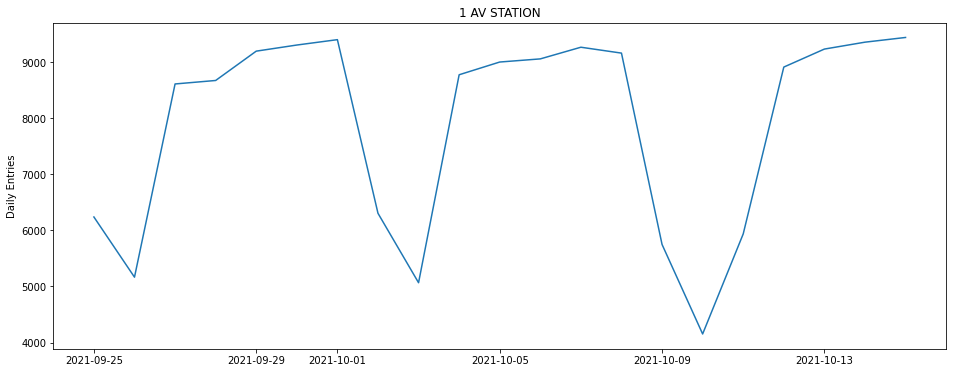

In [14]:
%matplotlib inline
filtered_mta_df = max_entries2.loc["1 AV"]
plt.figure(figsize=(16,6))
plt.plot(filtered_mta_df.index , filtered_mta_df['TOTAL_ENTRIES'])
plt.ylabel('Daily Entries')
plt.title('1 AV STATION')

#### Challenge 8

- Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week. (hint: [pandas datetime day of week](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html#pandas.Series.dt.dayofweek) may be useful)

`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.

In [15]:
max_entries3 = mta_df.groupby(by=[mta_df["STATION"] , mta_df["C/A | UNIT | SCP"] ,  mta_df['DATETIME'].dt.dayofweek]).max()[['ENTRIES']]
min_entries3 = mta_df.groupby(by=[mta_df["STATION"] , mta_df["C/A | UNIT | SCP"] ,  mta_df['DATETIME'].dt.dayofweek]).min()[['ENTRIES']]
max_entries3['TOTAL_ENTRIES'] = max_entries3['ENTRIES'] - min_entries3['ENTRIES']
max_entries3 = max_entries3.drop("ENTRIES",1)
max_entries3.head(10)

C:\Users\Ugur\AppData\Local\Temp/ipykernel_5700/3914335073.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  max_entries3 = max_entries3.drop("ENTRIES",1)


TOTAL_ENTRIES
STATION C/A | UNIT | SCP       DATETIME               
1 AV    H007 | R248 | 00-00-00 0                 10134
                               1                 10151
                               2                 10126
                               3                 10135
                               4                 10156
                               5                 10242
                               6                 10055
        H007 | R248 | 00-00-01 0                 15426
                               1                 15421
                               2                 15536

In [16]:
max_entries3 = max_entries3.groupby(["STATION","DATETIME"]).sum()

In [17]:
max_entries3.head(21)

TOTAL_ENTRIES
STATION       DATETIME               
1 AV          0                136019
              1                136247
              2                136819
              3                136885
              4                137030
              5                137038
              6                134744
103 ST        0                198424
              1                199337
              2                200101
              3                200565
              4                200734
              5                196903
              6                194701
103 ST-CORONA 0                162319
              1                163020
              2                164269
              3                164782
              4                165946
              5                162483
              6                158778

Text(0.5, 1.0, '1 AV STATION')

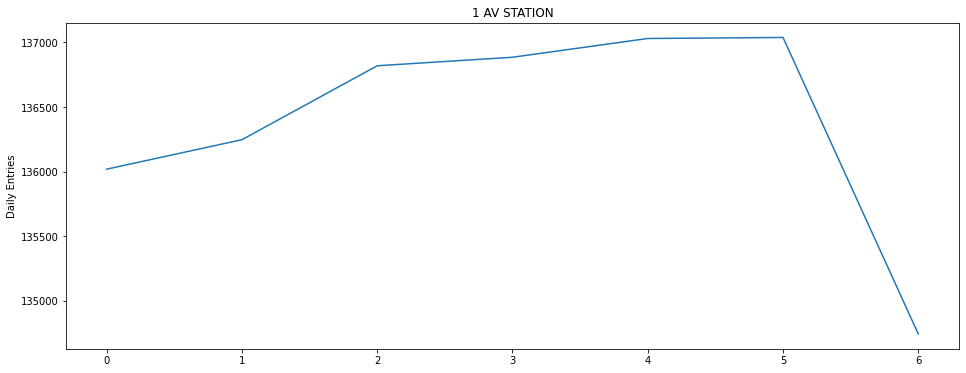

In [18]:
%matplotlib inline
filtered_mta_df = max_entries3.loc["1 AV"]
plt.figure(figsize=(16,6))
plt.plot(filtered_mta_df.index , filtered_mta_df['TOTAL_ENTRIES'])
plt.ylabel('Daily Entries')
plt.title('1 AV STATION')

#### Challenge 9

- Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate

In [28]:
sorted_max_entries3 = max_entries3.groupby("STATION").sum().sort_values(by ="TOTAL_ENTRIES" ,  ascending = False)

In [29]:
sorted_max_entries3.head(10)

,TOTAL_ENTRIES
STATION,
FULTON ST,25760320173
CANARSIE-ROCKAW,3123530500
8 AV,1997059105
5 AVE,956512537
FLUSHING AV,702466787
JAY ST-METROTEC,595507659
161/YANKEE STAD,586537164
47-50 STS ROCK,271482508
238 ST,150405208


#### Challenge 10

- Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among
different stations.

This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.

*Additional Hint*:

If you want to see which stations take the meat of the traffic, you
can sort the total ridership counts and make a `plt.bar` graph. For
this, you want to have two lists: the indices of each bar, and the
values. The indices can just be `0,1,2,3,...`, so you can do

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)

Text(0.5, 1.0, '1 AV STATION')

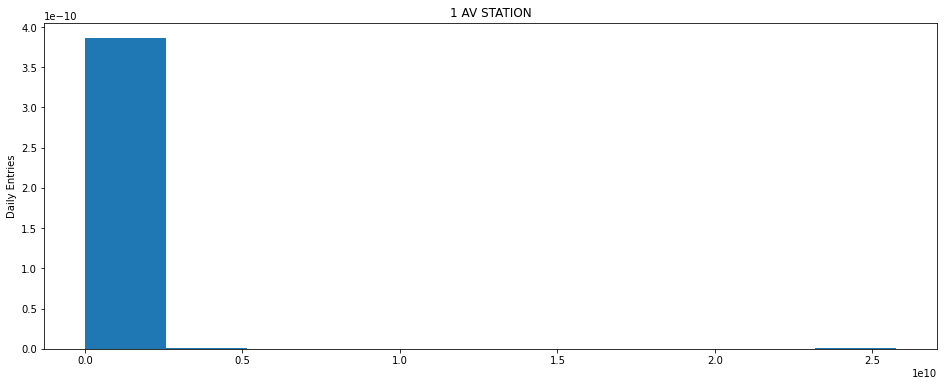

In [36]:
%matplotlib inline
plt.figure(figsize=(16,6))
plt.hist(sorted_max_entries3["TOTAL_ENTRIES"] , density=True, bins=10)
plt.ylabel('Daily Entries')
plt.title('1 AV STATION')

<BarContainer object of 379 artists>

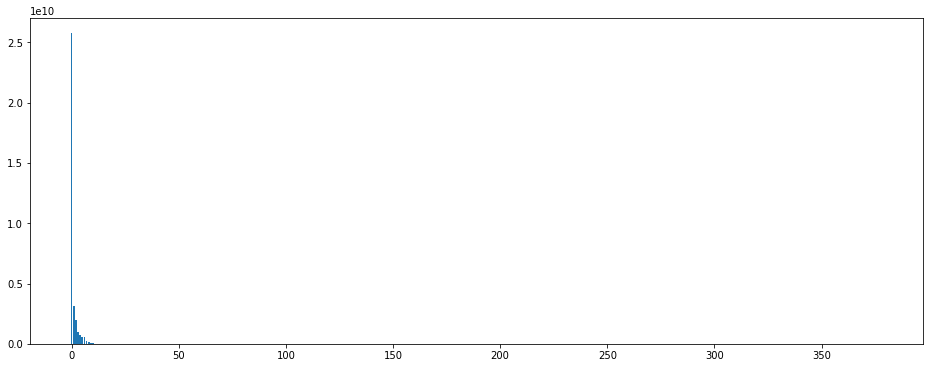

In [38]:
%matplotlib inline
plt.figure(figsize=(16,6))
indices = range(len(sorted_max_entries3))
plt.bar(indices, sorted_max_entries3["TOTAL_ENTRIES"])